## Titanic ship disaster- Passenger manifest data exploration & survival prediction with statistical analysis

### 1. Sourcing the data

In [1]:
#import libraries- pandas for handling data frame, numpy for required mathematical functions, matplotlib & seaborn for visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #set seaborn default for plots

In [2]:
#import training dataset
train= pd.read_csv("train.csv")

In [3]:
#view top 3 rows of train dataframe
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
#import test dataset
test=pd.read_csv("test.csv")

In [5]:
#view top 3 rows of test dataframe
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### 2. Data exploration
After cleaning out duplicate records, we want to visualise how many of the total passengers in dataset survived and then classify survivors based on gender.
Data dictionary from Kaggle:
<img src="https://i.ibb.co/vYy2ssx/data-dict.png">

In [6]:
#check data types for train data
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#change data type of Pclass and Survived columns to be objects
train['Pclass']=train['Pclass'].astype('object')
train['Survived']=train['Survived'].astype('object')
print(train.dtypes)

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
#check data types for test data
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#change data type of Pclass column to be object
test['Pclass']=test['Pclass'].astype('object')
print(test.dtypes)

PassengerId      int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [10]:
#shape of training data frame
train.shape

(891, 12)

In [11]:
#shape of test data frame
test.shape

(418, 11)

In [12]:
#find number of unique passenger names in train dataset
len(np.unique(train['Name']))

891

In [13]:
#find number of unique passenger names in test dataset
len(np.unique(test['Name']))

418

#### *Comparing DF shapes and unique records- no duplication is present in either training or test data*

In [14]:
#find survivors (1) & deaths (0) from training data
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
#calculate % proportions of survivors and fatalities
lived=len(train[train['Survived']==1])/len(np.unique(train['Name']))
died=len(train[train['Survived']==0])/len(np.unique(train['Name']))
print("Of the 891 people, ",round(lived*100),"% survived while ",round(died*100),"% perished in the Titanic disaster.\n",sep='')
print("Alternate representation: \n",train['Survived'].value_counts() / len(np.unique(train.Name)),sep='')

Of the 891 people, 38% survived while 62% perished in the Titanic disaster.

Alternate representation: 
0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [16]:
#find survivors (1) & deaths (0) based on sexes from training data
train.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [17]:
#proportions of survivors vs. deceased based on gender from training data
#first, group passenger list by gender totals
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
#Next, use above grouped totals to find proportions of survivors & deceased by each gender
female_alive=len(train[(train['Survived']==1) & (train['Sex']=='female')])/train['Sex'].value_counts()[1]
female_dead=len(train[(train['Survived']==0) & (train['Sex']=='female')])/train['Sex'].value_counts()[1]
male_alive=len(train[(train['Survived']==1) & (train['Sex']=='male')])/train['Sex'].value_counts()[0]
male_dead=len(train[(train['Survived']==0) & (train['Sex']=='male')])/train['Sex'].value_counts()[0]

print("Proportion of female survivors:",female_alive)
print("Proportion of male survivors: ",male_alive,"\n",sep='')

print("Proportion of female dead:",female_dead)
print("Proportion of male dead:",male_dead)

Proportion of female survivors: 0.7420382165605095
Proportion of male survivors: 0.18890814558058924

Proportion of female dead: 0.25796178343949044
Proportion of male dead: 0.8110918544194108


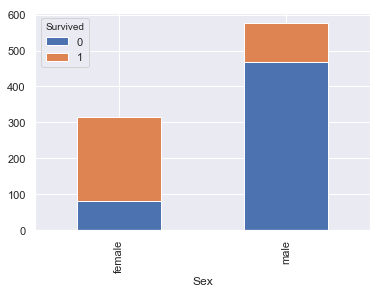

In [19]:
#Create a bar plot that compares how many people in training data survived and died based on Sex
train.groupby(['Sex','Survived']).size().unstack().plot(kind='bar',stacked='True')

### 3. Research Questions and Hypotheses

#### Research Question: Does the sex of the Titanic passenger help predict their survivability in the disaster?
Null hypothesis (H0): The variables `Sex` and `Survived` are *independent*. There is no relationship and the observed difference (55.31%) between the proportion of female and male survivors was due to chance.

Alternate hypothesis (H1): The variables `Sex` and `Survived` are not *independent*. The observed difference (55.31%) between the proportion of female and male survivors was not due to chance, and `Sex` does help predict who `Survived`.

## 4. Predict survival in the Titanic disaster and determine accuracy against true records. Submission to Kaggle competition will follow

### 4.1. First Model

In [20]:
#Assign a new column 'ModelPrediction' with all zero values, predicting that no one survives
train['ModelPrediction']=0

#check columns was created correctly
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ModelPrediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [21]:
#check percentage accuracy of this no survivors prediction against the reported 'survived' values for each passenger
print(round((len(train[train['ModelPrediction']==train['Survived']])/len(train['Survived']==0))*100,2),"%",sep='')

61.62%


In [22]:
#Assign a value of 1 into the ModelPrediction column for each female, predicting survival of all female passengers
train.loc[train['Sex']=='female','ModelPrediction']=1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ModelPrediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
#check percentage accuracy of this new model with all female survivors
print(round((len(train[train['ModelPrediction']==train['Survived']])/len(train['Survived']==0))*100,2),"%",sep='')

78.68%


### 4.1.1. Further Exploration

In [24]:
#compare survival against ticket class
pclass_survived=train.groupby(['Pclass','Survived']).size()
pclass_survived

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [25]:
#proportions of survivors based on classes from training data
#first, group passenger list by class totals
train['Pclass'].value_counts(sort=False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [26]:
#proportion of survivors in each ticket class
print("First Class:",pclass_survived[1][1]/train['Pclass'].value_counts()[1])
print("Second Class:",pclass_survived[2][1]/train['Pclass'].value_counts()[2])
print("Third Class:",pclass_survived[3][1]/train['Pclass'].value_counts()[3])

First Class: 0.6296296296296297
Second Class: 0.47282608695652173
Third Class: 0.24236252545824846


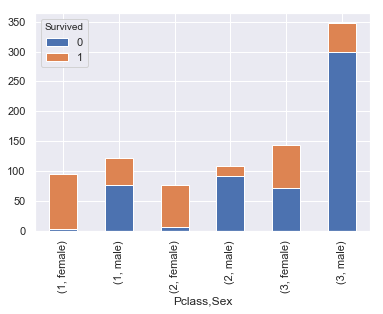

In [27]:
#bar plot of survivor proportion by ticket class and sex
train.groupby(['Pclass','Sex','Survived']).size().unstack().plot(kind='bar',stacked='True')

### 4.2. Second Model

In [28]:
#Reset ModelPrediction column to zero
train['ModelPrediction']=0

#check columns were reset correctly
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ModelPrediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
#Assume females only in 1st and 2nd classes survive
train.loc[(train['Sex']=='female')&(train['Pclass']!=3),'ModelPrediction']=1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ModelPrediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
#check percentage accuracy of this new model with all female survivors in 1st and 2nd class
print(round((len(train[train['ModelPrediction']==train['Survived']])/len(train['Survived']==0))*100,2),"%",sep='')

78.68%


In [31]:
#the percentage accuracy is the same as the first model. Let's refine the second model further by assuming all male passengers
#in 1st & 2nd class and under 18 survive- taking into consideration the 'Women and Children first' evacuation code at sea
train.loc[(train['Sex']=='male')&(train['Pclass']!=3)&(train['Age']<18.0),'ModelPrediction']=1
#check the new ModelPrediction value is in place
train[(train['Sex']=='male')&(train['Pclass']!=3)&(train['Age']<18.0)].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ModelPrediction
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0,NaN,S,1
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0,F4,S,1
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0,F2,S,1


In [32]:
#re-check accuracy of model
print(round((len(train[train['ModelPrediction']==train['Survived']])/len(train['Survived']==0))*100,2),"%",sep='')

79.91%


In [33]:
#assume female passengers under 18 in the 3rd class survived
train.loc[(train['Sex']=='female')&(train['Pclass']==3)&(train['Age']<18),'ModelPrediction']=1
print(round((len(train[train['ModelPrediction']==train['Survived']])/len(train['Survived']==0))*100,2),"%",sep='')

80.25%


#### <font color='blue'>*80.25% is a pretty good level of accuracy based on some basic observations of data- the upper-class who took priority at evacuation and complying with the  well known maritime disaster code (Women and Children off the boat first). In the next section, we can try to research some ML techniques of improving % accuracy further.*</font>

### 4.3. Applying machine learning models after data cleaning + feature engineering with statistical tools

In [34]:
#Drop ModelPrediction column
train.drop('ModelPrediction', axis=1, inplace=True)

#check columns were reset correctly
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
#find columns with missing NaN values in training data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
#find columns with missing NaN values in test data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
#Embarked feature in training set has 2 NaNs. It is an object type feature, so it only makes sense to use the port where 
#the most # of passengers boarded in this training set.
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [38]:
# combining train and test dataset
train_test_data = [train, test] 

#map port letters to digits for ML classifier
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for df_tt in train_test_data:
    df_tt['Embarked'] = df_tt['Embarked'].map(embarked_mapping)

In [39]:
#let's sort passengers by title
for df_tt in train_test_data:
    df_tt['Title'] = df_tt['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
train['Title'].value_counts()  #count by each title - training

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Capt          1
Don           1
Sir           1
Mme           1
Lady          1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

In [40]:
test['Title'].value_counts() #count by each title - test

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [41]:
#title mapping by Mr:0, Miss:1, Mrs:2, Others:3
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for df_tt in train_test_data:
    df_tt['Title'] = df_tt['Title'].map(title_mapping)
train.head() #check top 5 entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0


In [42]:
test.head() #check top 5 entries of test dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,2


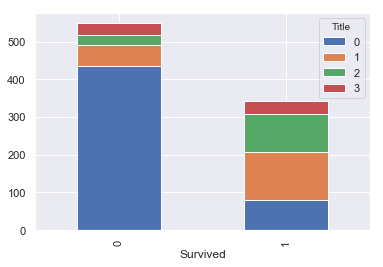

In [43]:
#check how many survived in training set according to titles
train.groupby(['Survived','Title']).size().unstack().plot(kind='bar',stacked='True')

In [44]:
#delete name column as knowing titles is enough
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
train.head() #check state of training set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,0


In [45]:
test.head() #check state of test set

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,0,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,0,2


In [46]:
#sex mapping by Male:0, Female:1
sex_mapping = {"male": 0, "female": 1}
for df_tt in train_test_data:
    df_tt['Sex'] = df_tt['Sex'].map(sex_mapping)

In [47]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,1,2


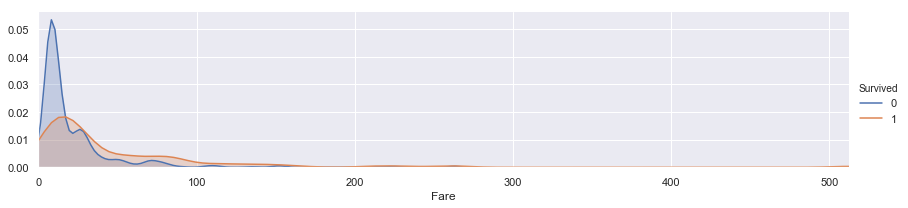

In [48]:
#check survival distribution by fare
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

(0, 50)

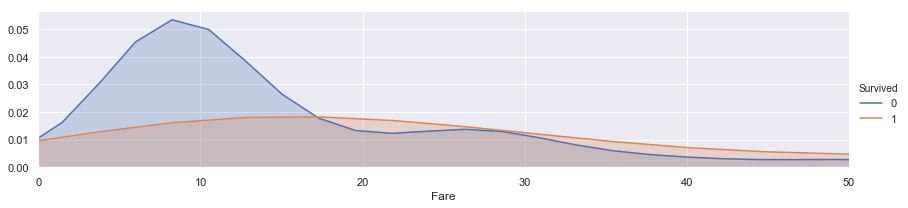

In [49]:
#zoom in to see variance in survival until 50 years of age
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 50)

In [50]:
#classify into fare groups based on above distribution
for df_tt in train_test_data:
    df_tt.loc[ df_tt['Fare'] <= 17, 'Fare'] = 0,
    df_tt.loc[(df_tt['Fare'] > 17) & (df_tt['Fare'] <= 30), 'Fare'] = 1,
    df_tt.loc[(df_tt['Fare'] > 30) & (df_tt['Fare'] <= 100), 'Fare'] = 2,
    df_tt.loc[ df_tt['Fare'] > 100, 'Fare'] = 3
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,35.0,0,0,373450,0.0,NaN,0,0


#### Infographic with cabin locations across the sinking Titanic
<img src="https://i.ibb.co/k959527/titanic-infog.png">
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png">

In [51]:
#The cabin feature in both datasets have a disproportionate amount of null values, but cannot be discarded from use by our 
#predictive tools. The reason is evident from the above 2 images. The first letter in the cabin number is the deck. 'A' deck 
#would have been closest to the lifeboats and chances of survival would have been reduced as you went down. From the lateral
#view of the ship, it's clear first class had a distinct advantage over 2nd or 3rd in access to lifeboats. With the bow quickly
#taking water, 3rd class at the front would have very little chance of making it out.

#Let's look at the number of passengers in each cabin- first letter denotes deck and then digits for room number
train.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
F2                 3
D                  3
E101               3
F33                3
C22 C26            3
F4                 2
C52                2
F G73              2
B49                2
E8                 2
B18                2
D33                2
E44                2
C78                2
B22                2
D26                2
B51 B53 B55        2
C68                2
D20                2
E121               2
D36                2
C125               2
C123               2
B57 B59 B63 B66    2
B28                2
D17                2
B58 B60            2
                  ..
A14                1
B50                1
D49                1
D37                1
B82 B84            1
C86                1
C62 C64            1
E58                1
C30                1
B39                1
A20                1
B41                1
B80                1
D45                1
B69                1
E12                1
D50          

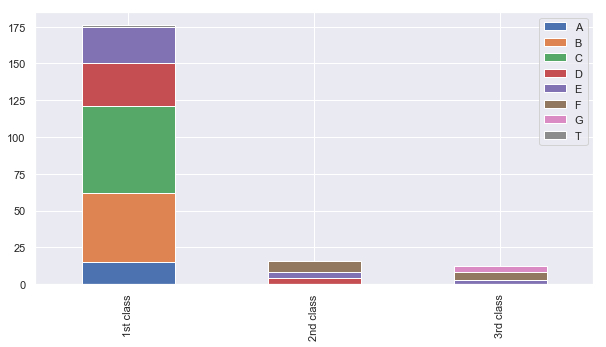

In [52]:
for df_tt in train_test_data:
    df_tt['Cabin'] = df_tt['Cabin'].str[:1]
    
#match each passenger's ticketed class and cabin 
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.unstack()
df.columns = pd.CategoricalIndex(df.columns.values, ordered=True)

# Sort the columns (axis=1) by the new categorical ordering
df = df.sort_index(axis=1)

df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [53]:
#decks mapped to numbers separated by discrete ranges for ML classifier to work
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for df_tt in train_test_data:
    df_tt['Cabin'] = df_tt['Cabin'].map(cabin_mapping)

In [54]:
# fill missing cabin numbers with median cabin allocation for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [55]:
#The null values for the Age feature in both train & test can be filled with the median value of each title (Mr, Mrs, Miss, others)
#in both datasets
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

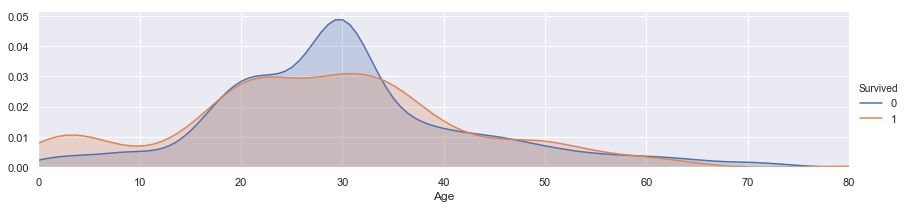

In [56]:
#survival distribution by age
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

#### Converting Numerical Age to Categorical Variable
We can group certain age ranges into named categories.
Feature vector map:-
child: 0,
young: 1,
adult: 2,
mid-age: 3, 
senior: 4

In [57]:
#introduce age categories
for df_tt in train_test_data:
    df_tt.loc[ df_tt['Age'] <= 16, 'Age'] = 0,
    df_tt.loc[(df_tt['Age'] > 16) & (df_tt['Age'] <= 26), 'Age'] = 1,
    df_tt.loc[(df_tt['Age'] > 26) & (df_tt['Age'] <= 36), 'Age'] = 2,
    df_tt.loc[(df_tt['Age'] > 36) & (df_tt['Age'] <= 62), 'Age'] = 3,
    df_tt.loc[ df_tt['Age'] > 62, 'Age'] = 4
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


In [58]:
#now re-check for Null values in both datasets
print("Training set: \n",train.isnull().sum(),"\n",sep='')
print("Test set: \n",test.isnull().sum(),sep='')

Training set: 
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

Test set: 
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


In [59]:
#Add a new column with family size accounting for married couples, their children (if any), siblings drawing from 'Parch' 
#&'SibSp' columns. Add 1 for lone travellers.
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

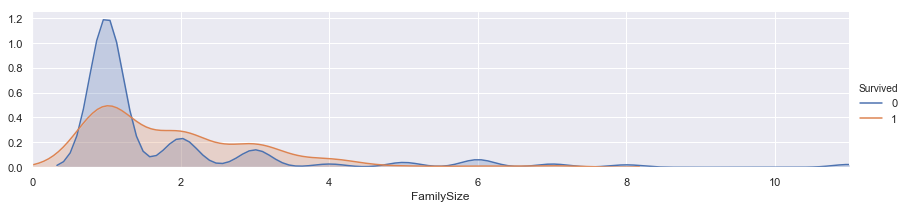

In [60]:
#plot survival distribution by family size
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [61]:
#family sizes mapped to numbers part of discrete ranges for ML classifiers to work
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

#drop ticket numbers which are strings not useful to ML algorithm, SibSp & Parch whos info is condensed into FamilySize
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

#drop Passenger id column as it acts like duplicate index in the training data
train = train.drop(['PassengerId'], axis=1)

In [62]:
train.info() #check all columns are non-null and not objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null object
Pclass        891 non-null object
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 62.7+ KB


In [63]:
#convert Pclass & Survived features back to int64
train=train.astype({'Pclass':'int64','Survived':'int64'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
FamilySize     418 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 29.5+ KB


In [65]:
#convert Pclass feature back to int64
test['Pclass']=test['Pclass'].astype('int64')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
FamilySize     418 non-null float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


In [66]:
#Prep for applying ML models- create one dataframe without true survival figures and other with target values
train_data= train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [67]:
#check top 10 rows of the training dataset to be fed into ML classifiers
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


### 4.4 Feature classification with Machine Learning algorithms

In [68]:
# Import classifier modules
from sklearn.neighbors import KNeighborsClassifier  #k-nearest neighbours classifier
from sklearn.tree import DecisionTreeClassifier  #decision tree classifier
from sklearn.ensemble import RandomForestClassifier  #random forest classifier
from sklearn.naive_bayes import GaussianNB  #Gaussian Naive Bayes classifier
from sklearn.svm import SVC  #Support-vector Machine

### 4.4.1 K-fold cross validation

In [69]:
#K-fold cross validation- run each classifier model through K rounds of K-1 subsets of training data and 1 for testing, then 
#pick the average score of these rounds as the given classifier's accuracy.
#9 folds of 89 rows and 1 of 90 rows (891 obsverations in training data)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
K_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 4.4.2. k-nn (KNN) classifier with GridSearchCV

In [70]:
#Importing the GridSearchCV package to fine tune the 'k' parameter in order to get optimal accuracy value
from sklearn.model_selection import GridSearchCV

In [71]:
#use this variable to run the K-nn classifier with the grid search tuned parameters
knn_cv = KNeighborsClassifier()

#define a range of k values for the grid search
k_range = list(range(1, 31))

#generate a paramter grid which is a dictionary of parameter name mapped to searcheable values
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [72]:
#perform K-fold cross-validated grid-search on parameter grid & optimize the k-nn model eval metric (classification accuracy)
#the scorer 'accuracy' is set as it is our desired evaluation metric
grid = GridSearchCV(knn_cv, param_grid, cv=K_fold, n_jobs=1, scoring='accuracy')
#fit grid with training data and target values
grid.fit(train_data, target)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [73]:
#view grid search results
grid.cv_results_

C:\Users\C5210360\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\C5210360\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\C5210360\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*

{'mean_fit_time': array([0.00402403, 0.00363574, 0.00423379, 0.00400188, 0.00392966,
        0.00282385, 0.0036458 , 0.00424297, 0.0036355 , 0.00388014,
        0.00346584, 0.00356576, 0.00409596, 0.00425217, 0.00444994,
        0.00341461, 0.00309491, 0.00470288, 0.00361607, 0.00281293,
        0.00402062, 0.00371015, 0.00425746, 0.00384562, 0.00324507,
        0.0046478 , 0.00423985, 0.00372815, 0.00365973, 0.00389361]),
 'std_fit_time': array([1.79006861e-03, 1.21454569e-03, 7.02877654e-04, 6.23306105e-05,
        2.56013195e-04, 1.84994900e-03, 1.21733086e-03, 6.96953647e-04,
        1.17026008e-03, 1.08753137e-03, 1.20449815e-03, 1.22319247e-03,
        9.04689250e-04, 7.51143781e-04, 9.42409885e-04, 1.24257674e-03,
        2.14692886e-03, 1.06471979e-03, 1.20681855e-03, 1.83598388e-03,
        8.43682505e-05, 6.27030232e-04, 6.83845778e-04, 4.93191638e-04,
        1.58844980e-03, 1.31303747e-03, 6.43847912e-04, 1.18444425e-03,
        6.81891833e-04, 1.00494557e-03]),
 'mean_scor

In [74]:
# Single best score (prediction accuracy) achieved with fine tuned parameters (k)
print("k-NN score: ",round(grid.best_score_*100,2))

# Dictionary containing the parameters (k) used to generate that highest score
print("k value for # of nearest neighbours: ", grid.best_params_)

# Actual model object fit with the best parameters
print(grid.best_estimator_)

k-NN score:  82.94
k value for # of nearest neighbours:  {'n_neighbors': 10}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')


Text(0, 0.5, 'Cross-Validated Accuracy')

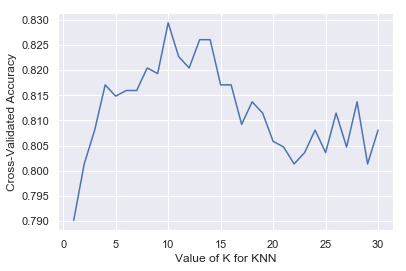

In [75]:
# plot the value of k for k-NN (x-axis) versus the cross-validated accuracy (y-axis)
cv_results = pd.DataFrame(grid.cv_results_)
grid_mean_scores = cv_results['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### <font color='blue'>*82.94% is an improvement from the 80.25% we got through basic observation of the training data. Machine Learning models are already showing their potential in tackling large datasets. Let's not stop now.*</font>

### 4.4.3. Decision Tree classifier

In [76]:
#generate a K-fold cross-validated decision tree and determine the model eval metric (classification accuracy) by averaging
#scores from the K-folds.
dt_cv = DecisionTreeClassifier()
score = cross_val_score(dt_cv, train_data, target, cv=K_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.76666667 0.80898876 0.78651685 0.7752809  0.88764045 0.76404494
 0.83146067 0.82022472 0.75280899 0.79775281]


In [77]:
#get average score over 10 folds
print("Decision Tree score: ",round(np.mean(score)*100, 2))

Decision Tree score:  79.91


### 4.4.4. Random Forest Classifier

In [78]:
#use this variable to run the random forest classifier with the grid search tuned parameters
rf_cv = RandomForestClassifier()

#define a range of n_estimators values for the grid search
n_range = [10,20,30,40,50,60,70,80,90,100,400,700,1000,1500]

#generate a parameter grid which is a dictionary of parameter name mapped to searcheable values
param_grid = dict(n_estimators=n_range)
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 400, 700, 1000, 1500]}


In [79]:
#perform K-fold cross-validated grid-search on parameter grid & optimize the RF model eval metric (classification accuracy)
#the scorer 'accuracy' is set as it is our desired evaluation metric
grid = GridSearchCV(rf_cv, param_grid, cv=K_fold, n_jobs=-1, scoring='accuracy')
#fit grid with training data and target values
grid.fit(train_data, target)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 400, 700, 1000, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [80]:
# Single best score (prediction accuracy) achieved with fine tuned n_estimators
print("Random Forest score: ",round(grid.best_score_*100,2))

# Dictionary containing the n_estimators used to generate that highest score
print("Best n_estimator value: ", grid.best_params_)

# Actual model object fit with the best parameters
print(grid.best_estimator_)

Random Forest score:  82.15
Best n_estimator value:  {'n_estimators': 700}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Text(0, 0.5, 'Cross-Validated Accuracy')

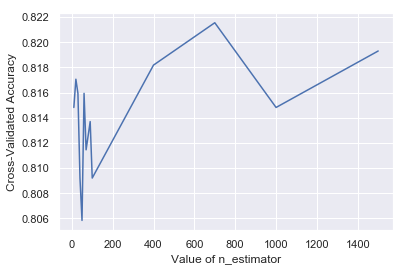

In [82]:
# plot the value of n_estimators for RF classifier (x-axis) versus the cross-validated accuracy (y-axis)
cv_results = pd.DataFrame(grid.cv_results_)
grid_mean_scores = cv_results['mean_test_score']
plt.plot([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 400, 700, 1000, 1500], grid_mean_scores)
plt.xlabel('Value of n_estimator')
plt.ylabel('Cross-Validated Accuracy')

### 4.4.5. Gaussian Naive Bayes Classifier

In [84]:
#generate a K-fold cross-validated GNB classifier and determine the model eval metric (classification accuracy) by averaging
#scores from the K-folds.
gnb_cv = GaussianNB()
score = cross_val_score(gnb_cv, train_data, target, cv=K_fold, n_jobs=1, scoring = 'accuracy')
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [88]:
#get average Gaussian Naive Bayes Score over 10 folds
print("Gaussian Naive Bayes score: ",round(np.mean(score)*100, 2))

Gaussian Naive Bayes score:  78.78


### 4.4.6. Support Vector Machine

In [96]:
#generate a K-fold cross-validated SVM classifier and determine the model eval metric (classification accuracy) by averaging
#scores from the K-folds.
svm_cv = SVC(gamma='scale')
score = cross_val_score(svm_cv, train_data, target, cv=K_fold, n_jobs=1, scoring = 'accuracy')
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [97]:
#get average SVM Score over 10 folds
print("Support Vector Machine score: ",round(np.mean(score)*100, 2))

Support Vector Machine score:  83.5


#### <font color='blue'>*83.5% is the best classification accuracy of all the prediction models we've used. We'll use SVM for predicting the survival rates in the Kaggle test dataset.*</font>

### 4.5. Testing

In [103]:
#initialize the SVM classifier and fit training data & targets to model
model = SVC(gamma='scale')
model.fit(train_data, target)

#drop unknown feature 'PassengerId' from test data and setup variable for storing the survival predictions
test_data = test.drop("PassengerId", axis=1).copy()
prediction = model.predict(test_data)

In [104]:
#conform to Kaggle submission requirements
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

#output csv with test data predictions
submission.to_csv('JoydiptoChoudhuri_RS_TitanicSubmission.csv', index=False)

In [105]:
#check first 5 rows of submission data
submission = pd.read_csv('JoydiptoChoudhuri_RS_TitanicSubmission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
